In [1]:
# Import needed packages for classification
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import packages for visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

# Import packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Read data, clean up names

beans = pd.read_csv("Dry_Bean_Dataset.csv")
print(beans.shape)
beans.describe()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
# Initialize model
beanKnnRegressor = KNeighborsRegressor(n_neighbors=5)
# Split data
X = beans[["MajorAxisLength", "MinorAxisLength"]]
y = beans[["ConvexArea"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [5]:
# Fit model and predict on test data
beanKnnRegressor.fit(X_train, np.ravel(y_train))
y_pred = beanKnnRegressor.predict(X_test)

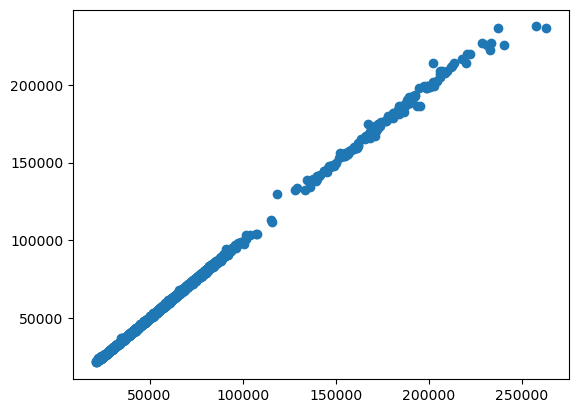

In [6]:
# Plot the actual value vs. the predicted value
plt.scatter(x=y_test, y=y_pred)

In [7]:
# Compute metrics
print(metrics.mean_squared_error(y_pred, y_test))
print(metrics.r2_score(y_pred, y_test))

652561.0585700297
0.9992983431878417
